### Regression Exercise
# Moneyball The NBA

##### Import Our Libraries

In [6]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse


from statsmodels.stats.outliers_influence import variance_inflation_factor


from statsmodels.api import qqplot

# import CTPLIB as ctp

```
SeasonEnd: Year season ended
Team: Name of team
Playoffs: If they made the playoffs. 1 == made to playoffs
W: Number of regular season in that season.
PTS: Points scored in regular season.
oppPTS: Opponent Points scored in regular season.
FG: Field Goals made (total shots made == 2P and 3P combined)
FGA: Field Goals attempted (total shots attempted == 2P and 3P combined)
2P: two-pointers made
2PA: two-pointers attempted
3P: three-pointers made
3PA: three-pointers attempted
FT: Free-Throws made (not included in FG stat)
FTA: Free-Throws attempted (not included in FG stat)
ORB: Offensive Rebounds
DRB: Defensive Rebounds
AST: Assists made
STL: Steals
BLK: Blocks
TOV: Turnovers
```

# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

In [7]:
# READ IN THE DATA USING PANDAS
df = pd.read_csv('NBA_train.csv')

df2 = pd.read_csv('NBA_train.csv')

# DISPLAY THE FIRST 5 ROWS
df.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533


#### Get a sense of how many wins it will take to make the playoffs.
Make a scatter plot with x=Wins and the y=Team, and the hue=Playoffs

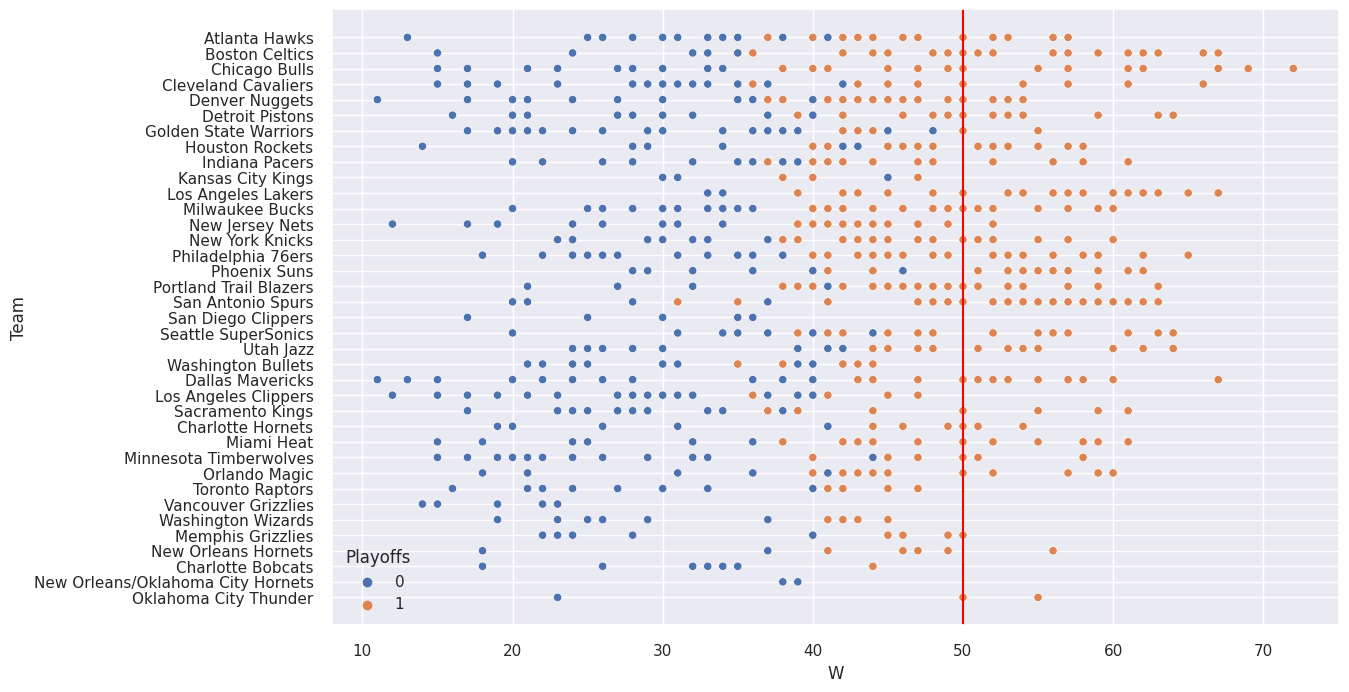

In [24]:
sns.set()

plt.figure(figsize=(13, 8))
ax = sns.scatterplot(df, x='W', y='Team', hue='Playoffs')
ax.axvline(x=50, color='red')


In [9]:
def inspect_dataframe(input_df):

    print('The Null Values:\n',input_df.isnull().sum())
    print('\n')
    if (input_df.duplicated().sum()) == 0:
        print('No Duplicate Values')
    else:
        print('There is Duplicate Values')
    print('\n')
    print('The Description:\n',input_df.describe())
    print('\n')
    print('Columns:')
    for col in input_df.columns:
        print(col)

    pass




In [10]:
inspect_dataframe(df)

The Null Values:
 SeasonEnd    0
Team         0
Playoffs     0
W            0
PTS          0
oppPTS       0
FG           0
FGA          0
2P           0
2PA          0
3P           0
3PA          0
FT           0
FTA          0
ORB          0
DRB          0
AST          0
STL          0
BLK          0
TOV          0
dtype: int64


No Duplicate Values


The Description:
          SeasonEnd    Playoffs           W           PTS        oppPTS  \
count   835.000000  835.000000  835.000000    835.000000    835.000000   
mean   1996.319760    0.574850   41.000000   8370.239521   8370.239521   
std       9.243808    0.494662   12.740822    581.040114    587.543959   
min    1980.000000    0.000000   11.000000   6901.000000   6909.000000   
25%    1989.000000    0.000000   31.000000   7934.000000   7934.000000   
50%    1996.000000    1.000000   42.000000   8312.000000   8365.000000   
75%    2005.000000    1.000000   50.500000   8784.500000   8768.500000   
max    2011.000000    1.000000   72

#### Get a sense of how many wins it will take to make the playoffs.
Make a scatter plot with x=Wins and the y=Team, and the hue=Playoffs

#### Take a rough estimate, and now use that moving forward.  



In [11]:
df_wins = df.groupby('Playoffs')['W'].mean()
print(df_wins)
WINS_NEED_TO_MAKE_PLAYOFFS = 50

Playoffs
0    29.174648
1    49.745833
Name: W, dtype: float64


# Now do moneyball but for the NBA.

#### I would like you to do try and do this on your own first.  

It's not easy, but its fun af.  

There is a guided lecture on how to do this that I can send you, but I'd like for you to try and figure it out on your own first.  

If you are fully stuck, ask in slack how other people did it if that doesn't work (I highly encourage collaboration and learning from each other.  I still consider that doing it on your own.)  

If that doesn't work, DM me and I will send you the lectures explaining how to do the whole thing.

# Rough Guide a v1 model.
0. Make a model to predict PTS
0. For v1, dont use `2P, 3P, FG, or FT`.  Instead use `2PA, 3PA, FTA`.  
0. Include any other cols use see fit.  

### What we are using
```
1. 2PA: two-pointers attempted
2. 3PA: three-pointers attempted
3. FTA: Free-Throws attempted (not included in FG stat)
```

In [12]:
df2 = df2.drop(columns=['SeasonEnd','FG','FGA','2P','3P','FT', 'ORB','DRB','AST', 'STL','BLK','TOV','Playoffs'])

# pd.set_option('display.max_rows', None)


In [13]:
df2.head()

,Team,W,PTS,oppPTS,2PA,3PA,FTA
0,Atlanta Hawks,50,8573,8334,6952,75,2645
1,Boston Celtics,61,9303,8664,6965,422,2449
2,Chicago Bulls,30,8813,9035,6668,275,2592
3,Cleveland Cavaliers,37,9360,9332,7854,187,2205
4,Denver Nuggets,30,8878,9240,7215,255,2539


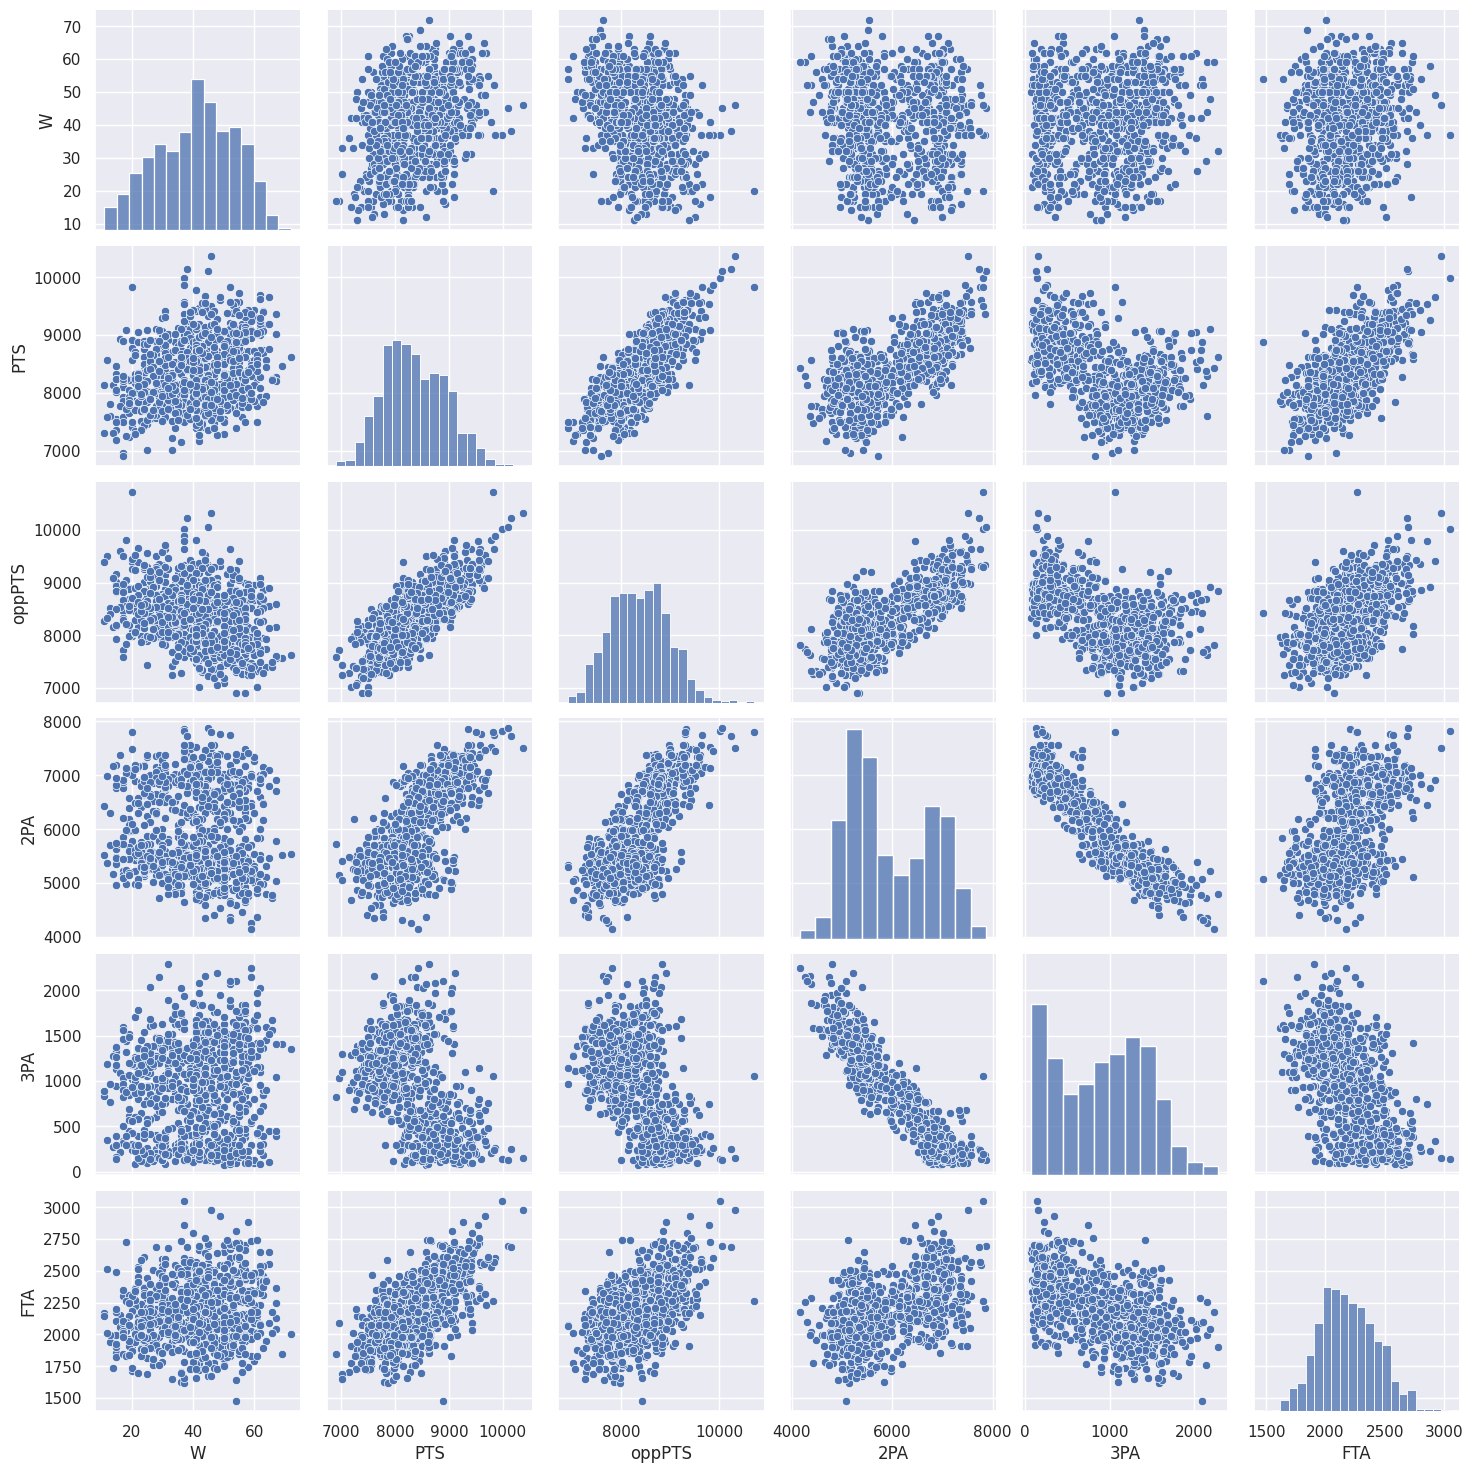

In [14]:
sns.pairplot(df2)

In [15]:
### load sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('NBA_new_train3')

,PTS,2PA,3PA,FTA
0,8573,6952,75,2645
1,9303,6965,422,2449
2,8813,6668,275,2592
3,9360,7854,187,2205
4,8878,7215,255,2539


In [16]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data, target = 'PTS')

,Description,Value
0,Session id,5713
1,Target,PTS
2,Target type,Regression
3,Original data shape,"(835, 4)"
4,Transformed data shape,"(835, 4)"
5,Transformed train set shape,"(584, 4)"
6,Transformed test set shape,"(251, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [17]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,203.0730,68928.8478,261.2283,0.7917,0.0312,0.0244,0.7650
lasso,Lasso Regression,203.0733,68928.8193,261.2282,0.7917,0.0312,0.0244,0.0160
ridge,Ridge Regression,203.0730,68928.8477,261.2283,0.7917,0.0312,0.0244,0.0170
en,Elastic Net,203.0734,68928.8051,261.2282,0.7917,0.0312,0.0244,0.0150
lar,Least Angle Regression,203.0730,68928.8478,261.2283,0.7917,0.0312,0.0244,0.0180
llar,Lasso Least Angle Regression,203.0733,68928.8195,261.2282,0.7917,0.0312,0.0244,0.0140
br,Bayesian Ridge,203.1105,68927.3550,261.2236,0.7917,0.0312,0.0244,0.0160
huber,Huber Regressor,211.8180,73202.4413,269.3000,0.7791,0.0324,0.0255,0.0280
catboost,CatBoost Regressor,214.4776,74926.1643,272.3617,0.7716,0.0327,0.0258,0.9140
et,Extra Trees Regressor,221.0513,77681.5046,277.4455,0.7650,0.0333,0.0266,0.1770


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

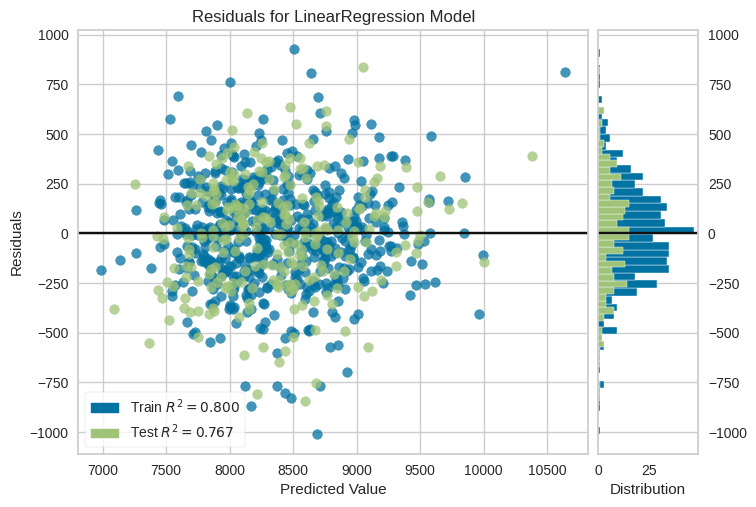

In [18]:
# plot residuals
plot_model(best, plot = 'residuals')

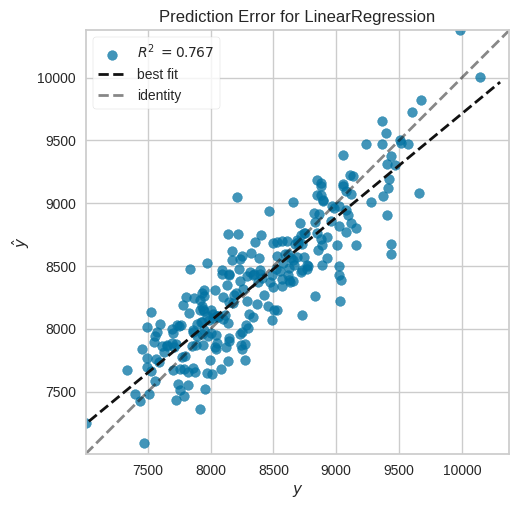

In [19]:
# plot error
plot_model(best, plot = 'error')

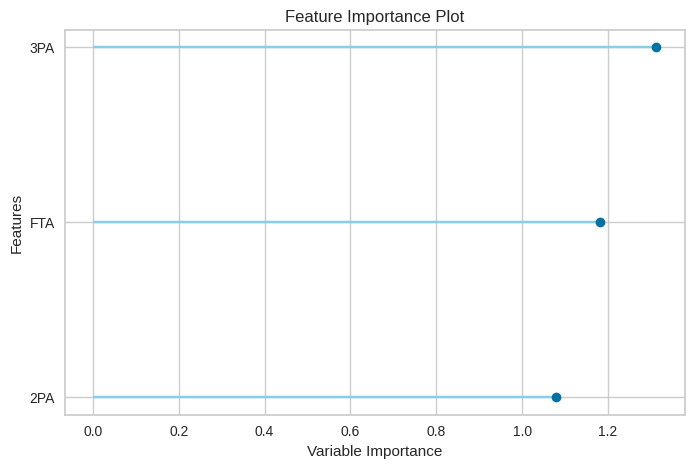

In [20]:
# plot feature importance
plot_model(best, plot = 'feature')

In [21]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [22]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,221.8828,77325.7680,278.0751,0.7665,0.0333,0.0266


In [23]:
# show predictions df
holdout_pred.head()

,2PA,3PA,FTA,PTS,prediction_label
496,5507,1374,2041,8036,8308.868971
265,6435,440,2211,8205,8284.145378
460,4843,1670,2120,8099,8074.817048
429,4596,1499,1995,7723,7436.264636
254,6771,226,2535,8718,8748.309799
